In [8]:
import torch
import pickle
import matplotlib.pyplot as plt

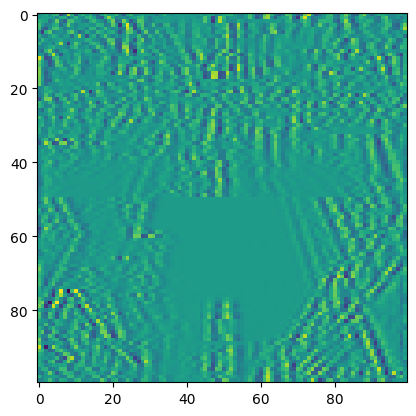

In [9]:
shp_original_img=(100,100)
broken_image=torch.FloatTensor(pickle.load(open('broken_image_t.p','rb'),encoding='latin1'))

plt.imshow(broken_image.view(100,100))

In [11]:
#weird_function()
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3,1./3,-1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor),0)
        h = filt[0]*h+filt[2]*h_l+filt[1]*h_r
        if i%2==0:
            h = torch.cat((h[h.shape[0]//2:],h[:h.shape[0]//2]),0)
    return h

In [12]:
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

In [13]:
random_tensor = torch.randn(10000, dtype=torch.float)

In [14]:
lr=0.8

In [15]:
for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()

    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad

    if i%1000==0:
        print('Loss at {}={}'.format(i,loss.item()))
        

Loss at 0=12.33732795715332
Loss at 1000=1.1360774040222168
Loss at 2000=0.5434842705726624
Loss at 3000=0.37591204047203064
Loss at 4000=0.29690009355545044
Loss at 5000=0.2484108954668045
Loss at 6000=0.21355485916137695
Loss at 7000=0.18586809933185577
Loss at 8000=0.16239939630031586
Loss at 9000=0.1416167914867401
Loss at 10000=0.12264955043792725
Loss at 11000=0.10496939718723297
Loss at 12000=0.08823905140161514
Loss at 13000=0.07223310321569443
Loss at 14000=0.056794628500938416
Loss at 15000=0.04181085154414177
Loss at 16000=0.027200086042284966
Loss at 17000=0.02115767076611519
Loss at 18000=0.021165573969483376
Loss at 19000=0.021167194470763206


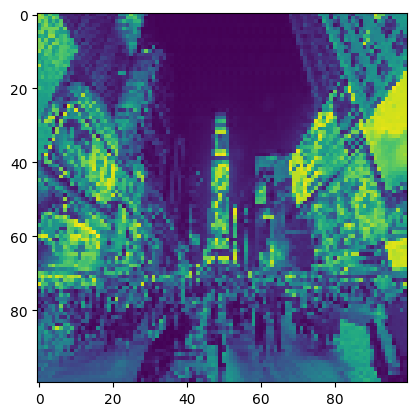

In [16]:
plt.imshow(random_tensor.view(100,100).data)